# 1. Python Concepts

We start by reviewing some more advanced Python concepts which might prove useful
in implementing your Machine Learning projects. In this notebook we focus on the following 
topics which, in particular, review some concepts related to functions in Python:

* f-strings
* subplots with Matplotlib
* type annotations and type hints
* eval function
* lambda functions
* generators
* built-in functions map and filter
* *args and **kwargs
* decorators
* speeding up function executions with Numba

Keywords: ```f"String"```, ```find```, ```plt.subplots```, ```plt.figure.add_subplot```, ```np.ravel```, ```eval```, ```lambda x: ...```, ```yield```, ```map```, ```filter```, ```*args```, ```**kwargs```, ```@decorator```, ```@jit```, ```%timeit```

***

## Important Python Libraries

There are several useful Python libraries for scientific computing and Machine Learning in Python.

* ```NumPy``` extends basic Python data structures (like lists) and provides efficient numerical functions for computations with large data arrays.

* ```SciPy``` builds on NumPy and provides extended functionality for numerical and statistical methods.

* ```Pandas``` incorporates data frames (similar to programming language R) and allows for more statistical analyses.

* ```Matplotlib``` is the standard plotting library in Python.

* ```Seaborn``` builds on Matplotlib and, in particular, extends Pandas functionality to create appealing plots.

* ```Scikit-learn``` is a powerful machine learning library that provides a wide range of learning algorithms. It builds upon NumPy, SciPy, and Matplotlib.

* ```TensorFlow``` is a library for efficient Machine Learning implementation and a standard library for Deep Learning.

* ```Keras``` is a high-level Deep Learning library built on top of TensorFlow, which simplifies creating, training, and evaluating neural networks.

* ```PyTorch``` is another standard library for Deep Learning adhering more closely to basic Python principles.


In this course, we will mostly work with ```NumPy```, ```Matplotlib```, ```sckit-learn```, and ```TensorFlow``` / ```Keras```.
You will be able to load these libraries like this

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

***

## f-Strings

Recommended string formatting since Python 3.6:

In [2]:
float_var = 3.141592

print(f'String formatting allows including variables like {float_var:.2f}.')

String formatting allows including variables like 3.14.


And while we are talking about strings: When you want to ```find``` a substring in a string, you can use

In [5]:
example_string = f'String formatting allows including variables like {float_var:.2f}.'

search_string = 'variable'

index_of_search = example_string.find(search_string)

search_string_len = len(search_string)

print(f"Starting from index {index_of_search}: '{example_string[index_of_search:index_of_search+search_string_len]}'")

Starting from index 35: 'variable'


In [6]:
example_string.find('missing')

-1

***

## Subplots with Matplotlib

Let us create some dummy images:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

dummy_images = [[[0,0,0,0,0],
                 [0,1,1,1,0],
                 [0,0,1,0,0],
                 [0,0,1,0,0],
                 [0,0,0,0,0]],
                
                [[0,0,0,0,0],
                 [0,0,1,0,0],
                 [0,1,1,1,0],
                 [0,0,1,0,0],
                 [0,0,0,0,0]],
                
                [[0,0,0,0,0],
                 [0,1,1,0,0],
                 [0,0,1,0,0],
                 [0,0,1,0,0],
                 [0,0,0,0,0]]]

We usually use ```plt.subplots``` to create a figure with several sub-figures.

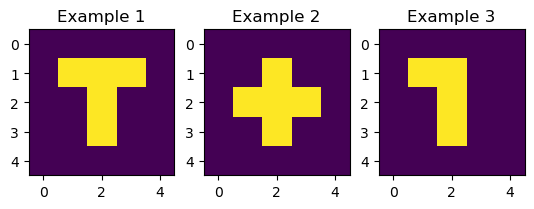

In [11]:
fig, axs = plt.subplots(1,3)

axs[0].imshow(dummy_images[0])
axs[0].set_title('Example 1')

axs[1].imshow(dummy_images[1])
axs[1].set_title('Example 2')

axs[2].imshow(dummy_images[2])
axs[2].set_title('Example 3')

plt.show()

Another way to plot this is:

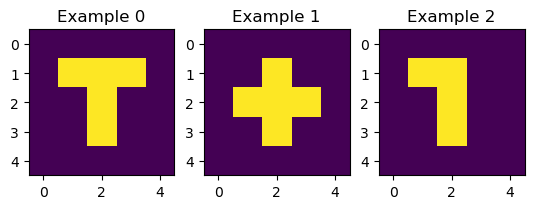

In [15]:
fig, axs = plt.subplots(1,3)

for i, ax in enumerate(axs.ravel()):
    ax.imshow(dummy_images[i])
    ax.set_title(f"Example {i}")

plt.show()

#### Note
that you can iterate over subplots stored in object ```axs``` 
 
```Python
In: print(axs)
Out: [<Axes: > <Axes: > <Axes: >]
```

with method ```ravel``` which creates a list of subplots.

There is a second way to create subplots which makes use of the ```plf.figure.add_subplot```
method. This is particularly useful when combining 3d and 2d sub-figures like in the
following example.

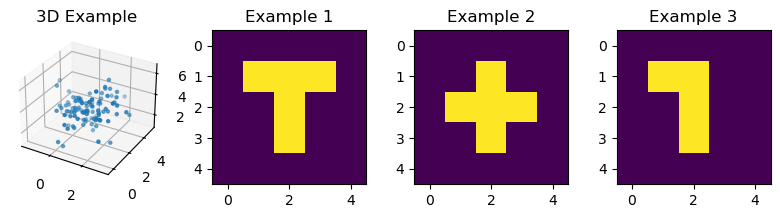

In [16]:
data_3d = np.random.multivariate_normal(mean=[1,2,4], cov=np.eye(3), size=100)

fig = plt.figure(figsize=(10,2))

ax = fig.add_subplot(1,4,1, projection='3d')
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2], marker='.')

ax.set_title('3D Example')

ax = fig.add_subplot(1,4,2)

ax.imshow(dummy_images[0])
ax.set_title("Example 1")

ax = fig.add_subplot(1,4,3)

ax.imshow(dummy_images[1])
ax.set_title("Example 2")

ax = fig.add_subplot(1,4,4)
ax.imshow(dummy_images[2])
ax.set_title("Example 3")

plt.show()

***

## Type Annotations and Type Hints

You might have appreciated Python for its *dynamic typing*, i.e. that Python allows variables to change their data type during runtime. However, this kind of flexibility can make your code more prone to errors such that proficient coding in Python often resorts back to a flavour of *static typing* by using **type annotations**. 

Consider the following example:

In [17]:
counter = 1

text = 'This is a test'

country_codes = {'Switzerland': 41, 'France': 33, 'Italy': 39, 
                 'UK': 44, 'Germany': 49}

text = 100

The following might remind you of variable declarations you've seen in C, C++ or other statically typed programming languages:

In [18]:
counter: int = 1

text: str = 'This is a test'

country_codes: dict[str, int] = {'Switzerland': 41, 'France': 33, 'Italy': 39, 
                                 'UK': 44, 'Germany': 49}

text = 100

Advantages of type annotations include that typical IDEs support checking whether variables are assigned the expected type and automated unit tests can be used more efficently. In PyCharm, the above example would provide the following

<img src="images/type_annotation_PyCharm.png" alt="Type annotation in PyCharm" width="700"/>

This can be particularly useful when your code becomes increasingly abstract, e.g. with functions

In [19]:
def divide_10_by(some_numbers: list[float]) -> None:

    for num in some_numbers:
        print(f'10/{num} = {10/num}')
        
my_numbers: list[float] = [0.5, 20.0, 100.0]

divide_10_by(some_numbers = my_numbers)

10/0.5 = 20.0
10/20.0 = 0.5
10/100.0 = 0.1


or classes

In [ ]:
class Person:
    ...

alice: Person = Person()

***

## Eval Function

Did you ever wonder whether you can pass a string which gets evaluate as a Python expression within your code?
Indeed, the ```eval``` provides this possibility:

In [20]:
my_data = np.array([10, 20, 30])

my_input = 'print(my_data**2)'

eval(my_input)

[100 400 900]


You require a valid Python expression in ```my_input``` for this to work!

In [23]:
my_input = input()

eval(my_input)

KeyboardInterrupt: Interrupted by user

***

## Lambda Functions

Typically, we declare a function like this in Python:

In [25]:
def fahrenheit_to_celsius(deg_F):
    return (deg_F - 32) * 5/9

In [26]:
fahrenheit_to_celsius(98.6)

37.0

For such simple **single expression functions** a lambda function might
be a convenient choice.

In [27]:
fahrenheit_to_celsius_lambda = lambda x: (x - 32) * 5/9

In [28]:
fahrenheit_to_celsius_lambda(98.6)

37.0

They are sometimes referred to as **anonymous functions**, as they are not 
required to be bound to a name, e.g.

In [29]:
(lambda x: (x - 32) * 5/9)(98.6)

37.0

We will see a more interesting example below!

***

## Generators

Generator functions are special functions particularly suited for 
generating sequences of various kind. 

In [30]:
def squared_sequence(limit):
    num = 0
    
    while num < limit:
        yield num**2
        num += 1 

where ```num += 1``` is shorthand for ```num = num + 1```.

In [31]:
squared_sequence(10)

<generator object squared_sequence at 0x175a305f0>

In [32]:
gen = squared_sequence(10)

In [37]:
next(gen)

16

In [38]:
for i in squared_sequence(10):
    print(i)

0
1
4
9
16
25
36
49
64
81


#### Note 
that the above is equivalent to 

```Python
for i in range(10):
   print(i**2)
```


#### Note the differences to standard functions:
* Generators *yield* values, suspend the function and maintain the local state 
* The values are generated when they are required (called with ```next()```), i.e. we do not store a whole list but generate one element at a time
* Once all elements are generated, the iteration stops

However, you can still have all elements in a list if need be:

In [39]:
list(squared_sequence(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

***

## Map and Filter

The built-in functions ```map``` and ```filter``` are convenient ways to 
apply a function to all elements of an iterable and avoid writing a loop for that.

With ```map``` we apply the function to each element of the iterable(s) and return the results. 
We use it in the following way:

```Python
map( function, iterable(s) )
```

Let's see some examples.

In [40]:
from matplotlib.colors import to_rgb

colours = ['green', 'red', 'blue', 'yellow']

# for c in colours:
#     print(f"{c} in RGB is: {to_rgb(c)}")

rgb_colours = map( to_rgb, colours )

print(f"Try to print rgb_colours: {rgb_colours}\n")

print(list(rgb_colours))

Try to print rgb_colours: <map object at 0x1759bf760>

[(0.0, 0.5019607843137255, 0.0), (1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (1.0, 1.0, 0.0)]


In [41]:
decimals = [3.14159, 2.71828, 1.61803]

rounded = list( map( round, decimals, range(1,4) ) )

print(rounded)

[3.1, 2.72, 1.618]


With ```filter``` we apply a boolean function to an iterable and provide only the elements
which returned ```True```. We use it like this:

```Python
filter( function, iterable )
```

where ```function``` returns boolean values ```True``` or ```False```.

In [43]:
def passed(grade):
    return grade > 4.0

In [44]:
grades = [5.5, 6.0, 2.0, 3.5, 4.5]

list( filter(passed, grades) )

[5.5, 6.0, 4.5]

A typical use case of lambda functions is actually in connection with ```map``` or ```filter```.

In [45]:
list( filter( lambda grade: grade > 4.0, grades ) )

[5.5, 6.0, 4.5]

In [46]:
list( map( lambda grade: grade > 4.0, grades ) )

[True, True, False, False, True]

***

## *args and **kwargs

Sometimes you see these ```*args``` and ```**kwargs``` arguments in functions and classes.
We use them to write functions with variable number of arguments of positional and keyword arguments!

Here's an example:

In [64]:
def print_arguments(first, *args, **kwargs):
    
    print(first)
    
    if args:
        print(args)
        
    if kwargs:
        print(kwargs)

In [65]:
print_arguments()

TypeError: print_arguments() missing 1 required positional argument: 'first'

In [66]:
print_arguments(1)

1


In [67]:
print_arguments(1, 2, 3)

1
(2, 3)


In [68]:
print_arguments(1, 2, 3, 4, color='red', marker='x')

1
(2, 3, 4)
{'color': 'red', 'marker': 'x'}


#### Note 
that with ```*args``` we collect additional positional arguments in a tuple
and with ```**kwargs``` the additional keyword arguments in a dictionary.

***

## Decorators

Decorators are a great way to modify the behaviour of a function or class
without changing the function or class itself.

In [89]:
def fahrenheit_to_celsius(deg_F):
    deg_C = (deg_F - 32) * 5/9
    return deg_C

In [90]:
fahrenheit_to_celsius(80)

26.666666666666668

Let's define a decorator and "decorate" the previous function!

In [91]:
def just_int(func): 
    
    def wrapper(*args, **kwargs):
        
        res = func(*args, **kwargs)
        
        print(int(res))
        
        return res
    
    return wrapper  

In [92]:
@just_int
def fahrenheit_to_celsius(deg_F):
    deg_C = (deg_F - 32) * 5/9
    return deg_C

In [93]:
fahrenheit_to_celsius(deg_F=80)

26


26.666666666666668

In [94]:
just_int(fahrenheit_to_celsius)(80)

26
26


26.666666666666668

In [74]:
def just_int(print_out=None):
    
    def just_int_inner(func): 

        def wrapper(*args,**kwargs):

            if print_out:
                print(print_out)
                
            res = func(*args,**kwargs)
            return int(res)

        return wrapper  
    
    return just_int_inner

In [77]:
@just_int(print_out='Get rid of decimals!')
def fahrenheit_to_celsius(deg_F):
    deg_C = (deg_F - 32) * 5/9
    return deg_C

In [78]:
fahrenheit_to_celsius(deg_F=80)

26

***

## Numba

Numba is a just-in-time compiler for Python which can speed up your code substantially 
if it is based on loops, NumPy arrays and NumPy functions. Its main feature is the
```jit``` decorator. Find more on Numba in the [official documentation](https://numba.readthedocs.io/en/stable/user/5minguide.html).

Let's see what it does on a small example.

In [81]:
from numba import jit
import numpy as np

In [83]:
def calc_pi(total_num_points): 
    np.random.seed(1234)
    
    num_circle_points = 0
    
    for i in range(total_num_points):
        x = np.random.random()
        y = np.random.random()
        radius_squared = np.power(x,2) + np.power(y,2)
        
        if radius_squared < 1:
            num_circle_points += 1
           
    pi_estimate = 4 * num_circle_points / total_num_points
    return pi_estimate

In [84]:
@jit
def calc_pi_faster(total_num_points): 
    np.random.seed(1234)
    
    num_circle_points = 0
    
    for i in range(total_num_points):
        x = np.random.random()
        y = np.random.random()
        radius_squared = np.power(x,2) + np.power(y,2)
        
        if radius_squared < 1:
            num_circle_points += 1
           
    pi_estimate = 4 * num_circle_points / total_num_points
    return pi_estimate

The function ```calc_pi_faster``` is compiled to machine code when called for 
the first time.

In [85]:
total_num_points = 100000

print(f"calc_pi: {calc_pi(total_num_points)}")
print(f"calc_pi_faster: {calc_pi_faster(total_num_points)}")

calc_pi: 3.14856
calc_pi_faster: 3.14856


In [86]:
%timeit calc_pi(total_num_points)

275 ms ± 2.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
%timeit calc_pi_faster(total_num_points)

653 µs ± 4.36 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Note
that Jupyter (IPython) provides some built-in Python functionality through 
*magic commands* ```%command```.

***

## Exercise Section

Generators are very useful when loading datasets, for instance. Suppose your dataset is too large to load into memory (RAM)
(e.g. several tens of GB). Typically, a possible approach is to load parts of the dataset during training as needed. 

In this exercise, we implement a generator to load *batches* of images from the **MNIST dataset**. MNIST is a standard Deep Learning 
benchmark dataset comprising 70 000 images (usually 28 x 28 pixels) of hand-written digits with the corresponding label as the 
classification target. 

<center><img src="images/MNIST_example.png" alt="MNIST Example" width="500"/></center>

You can load the dataset (reduced to 5'000 samples) in the next cell.

In [95]:
import numpy as np

mnist_data = np.load('data/mnist_data_5k.npy', mmap_mode='r', allow_pickle=True)
mnist_targets = np.load('data/mnist_labels_5k.npy', mmap_mode='r', allow_pickle=True)

Note that ```mmap_mode='r'``` specifies that we do not load data into memory but instead a memory-mapped array is constructed.
This means, the data is read from the disk whenever accessed. Note that

```Python
    In[1]:  mnist_data = np.load('data/mnist_data_5k.npy', mmap_mode='r')
    In[2]:  type(mnist_data)
    Out[2]: numpy.memmap
```

provides a ```memmap``` object, while 

```Python
    In[1]:  mnist_data = np.load('data/mnist_data_5k.npy')
    In[2]:  type(mnist_data)
    Out[2]: numpy.ndarray
```

provides the standard NumPy array. These are two different types of objects. ```memmap``` lives still on the disk,
while the NumPy array is loaded into RAM. Note that in a ```memmap``` many but not all NumPy operations will work.

(1.) Define a generator which allows passing the data, targets, and the size of the batch in the following cell. 
For e.g. ```batch_size=10```, the generator shall slice both arrays into the first 10 samples and provide them with 
the ```next``` call. With every following call, the next 10 samples are provided. So you need to think about how to
access a slice of data in NumPy arrays and how consecutively get the next slice with the next call by adjustind the indices.

If you were successful, you can create the generator with

In [ ]:
mnist_gen = batch_data(data=mnist_data, targets=mnist_targets, batch_size=10)

and retrieve a (new) batch of data with

In [ ]:
new_data, new_targets = next(mnist_gen)

print(f"Target labels in this batch: {new_targets}")

***

## Proposed Solutions

Generators are very useful when loading datasets, for instance. Suppose your dataset is too large to load into memory (RAM)
(e.g. several tens of GB). Typically, a possible approach is to load parts of the dataset during training as needed. 

In this exercise, we implement a generator to load *batches* of images from the **MNIST dataset**. MNIST is a standard Deep Learning 
benchmark dataset comprising 70 000 images (usually 28 x 28 pixels) of hand-written digits with the corresponding label as the 
classification target. 

<center><img src="images/MNIST_example.png" alt="MNIST Example" width="500"/></center>

You can load the dataset (reduced to 5 000 samples) in the next cell.

In [96]:
import numpy as np

mnist_data = np.load('data/mnist_data_5k.npy', mmap_mode='r', allow_pickle=True)
mnist_targets = np.load('data/mnist_labels_5k.npy', mmap_mode='r', allow_pickle=True)

Note that ```mmap_mode='r'``` specifies that we do not load data into memory but instead a memory-mapped array is constructed.
This means, the data is read from the disk whenever accessed. Note that

```Python
    In[1]:  mnist_data = np.load('data/mnist_data_5k.npy', mmap_mode='r')
    In[2]:  type(mnist_data)
    Out[2]: numpy.memmap
```

provides a ```memmap``` object, while 

```Python
    In[1]:  mnist_data = np.load('data/mnist_data_5k.npy')
    In[2]:  type(mnist_data)
    Out[2]: numpy.ndarray
```

provides the standard NumPy array. These are two different types of objects. ```memmap``` lives still on the disk,
while the NumPy array is loaded into RAM. Note that in a ```memmap``` many but not all NumPy operations will work.

(1.) Define a generator which allows passing the data, targets, and the size of the batch in the following cell. 
For e.g. ```batch_size=10```, the generator shall slice both arrays into the first 10 samples and provide them with 
the ```next``` call. With every following call, the next 10 samples are provided. So you need to think about how to
access a slice of data in NumPy arrays and how consecutively get the next slice with the next call by adjustind the indices.

In [100]:
def batch_data(data, targets, batch_size):
    batch_num = 0
    tot_num_batches = int(data.shape[0] / batch_size)
    
    while batch_num < tot_num_batches:
        
        data_batch = data[batch_num*batch_size : (batch_num+1)*batch_size]
        
        targets_batch = targets[batch_num*batch_size:(batch_num+1)*batch_size]
        
        yield np.array(data_batch), np.array(targets_batch)
        
        batch_num = batch_num + 1

If you were successful, you can create the generator with

In [101]:
mnist_gen = batch_data(data=mnist_data, targets=mnist_targets, batch_size=10)

and retrieve a (new) batch of data with

In [105]:
new_data, new_targets = next(mnist_gen)

print(f"Target labels in this batch: {new_targets}")

Target labels in this batch: [3 8 6 9 0 5 6 0 7 6]
